<h1>Loan Approval Classification</h1>
Datasets from Kaggle <a href="https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data">Loan Approval Classification Dataset</a>
<h3>Project description</h3>
<p>&emsp;&emsp;&emsp;The goal of this project is to classify loan approval status. So I have to learn about classification models such as <b>Logistic Regression</b>.</p>
Author: <a href="www.linkedin.com/in/chanut-sunatho-5a3897271">Chanut Sunatho</a>

<h2>Data Retrieval</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loan = pd.read_csv("./data/loan_data.csv")

In [3]:
loan.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [5]:
loan.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [6]:
print(f'Missing values: {loan.isna().sum().sum()}')
print(f'Duolicated values: {loan.duplicated().sum()}')

Missing values: 0
Duolicated values: 0


<h2>Explore Data Analysis</h2>
Start with analyst every numerical number except "loan_status" column

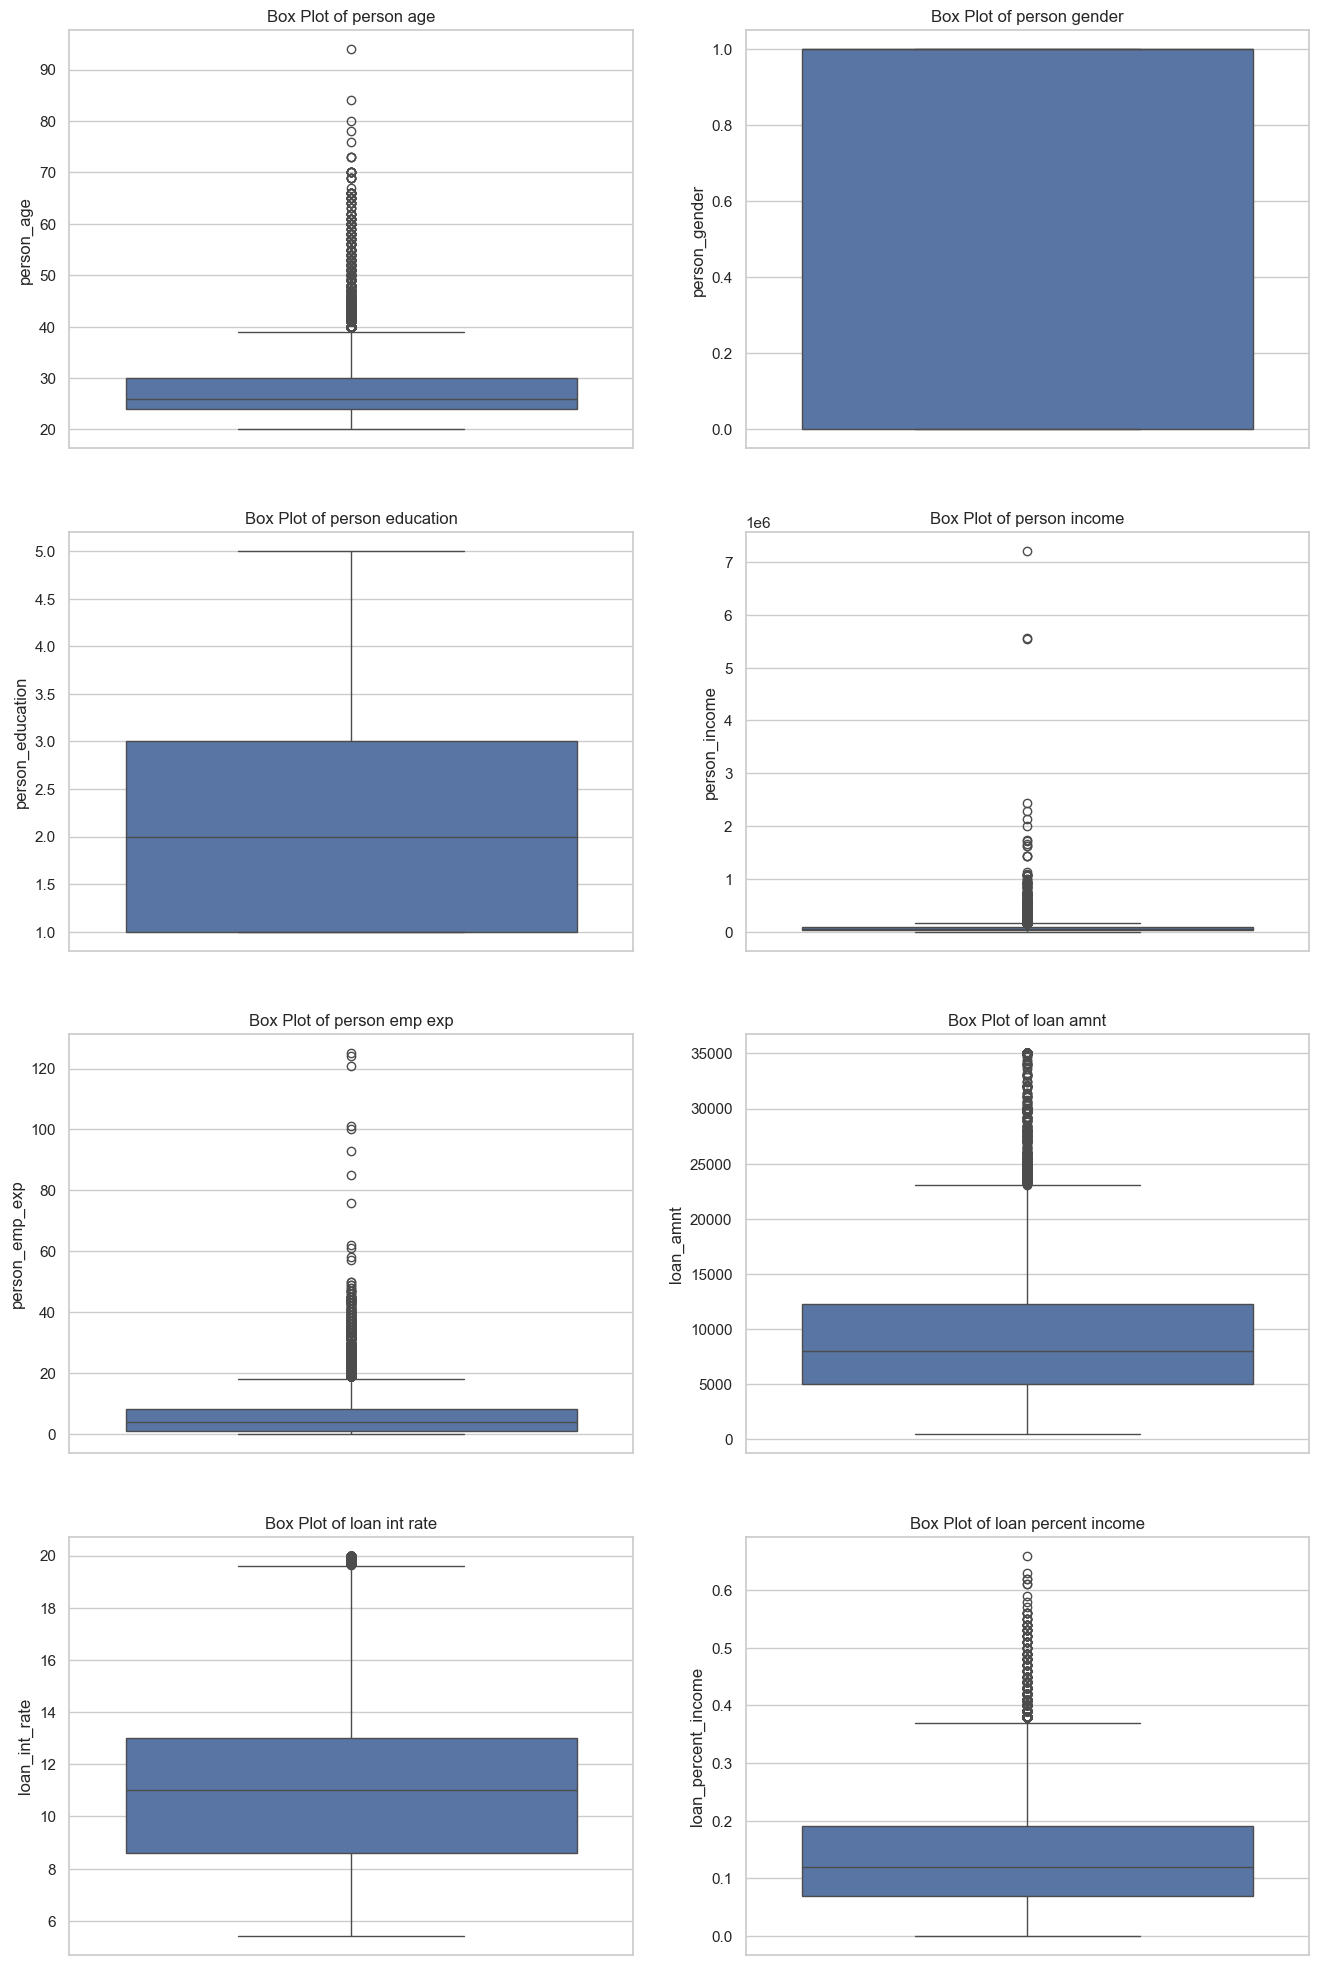

In [30]:
numrical_columns = loan.select_dtypes(include='number').drop("loan_status", axis=1).columns

sns.set(style="whitegrid", font_scale=1)
fig, axes = plt.subplots(4, 2, figsize=(16,25))
img = 0
for row in range(4):
    for column in range(0, 2):
        axes[row, column].title.set_text("Box Plot of " + numrical_columns[img].replace("_", " "))
        sns.boxplot(loan[numrical_columns[img]], ax=axes[row, column])
        img += 1

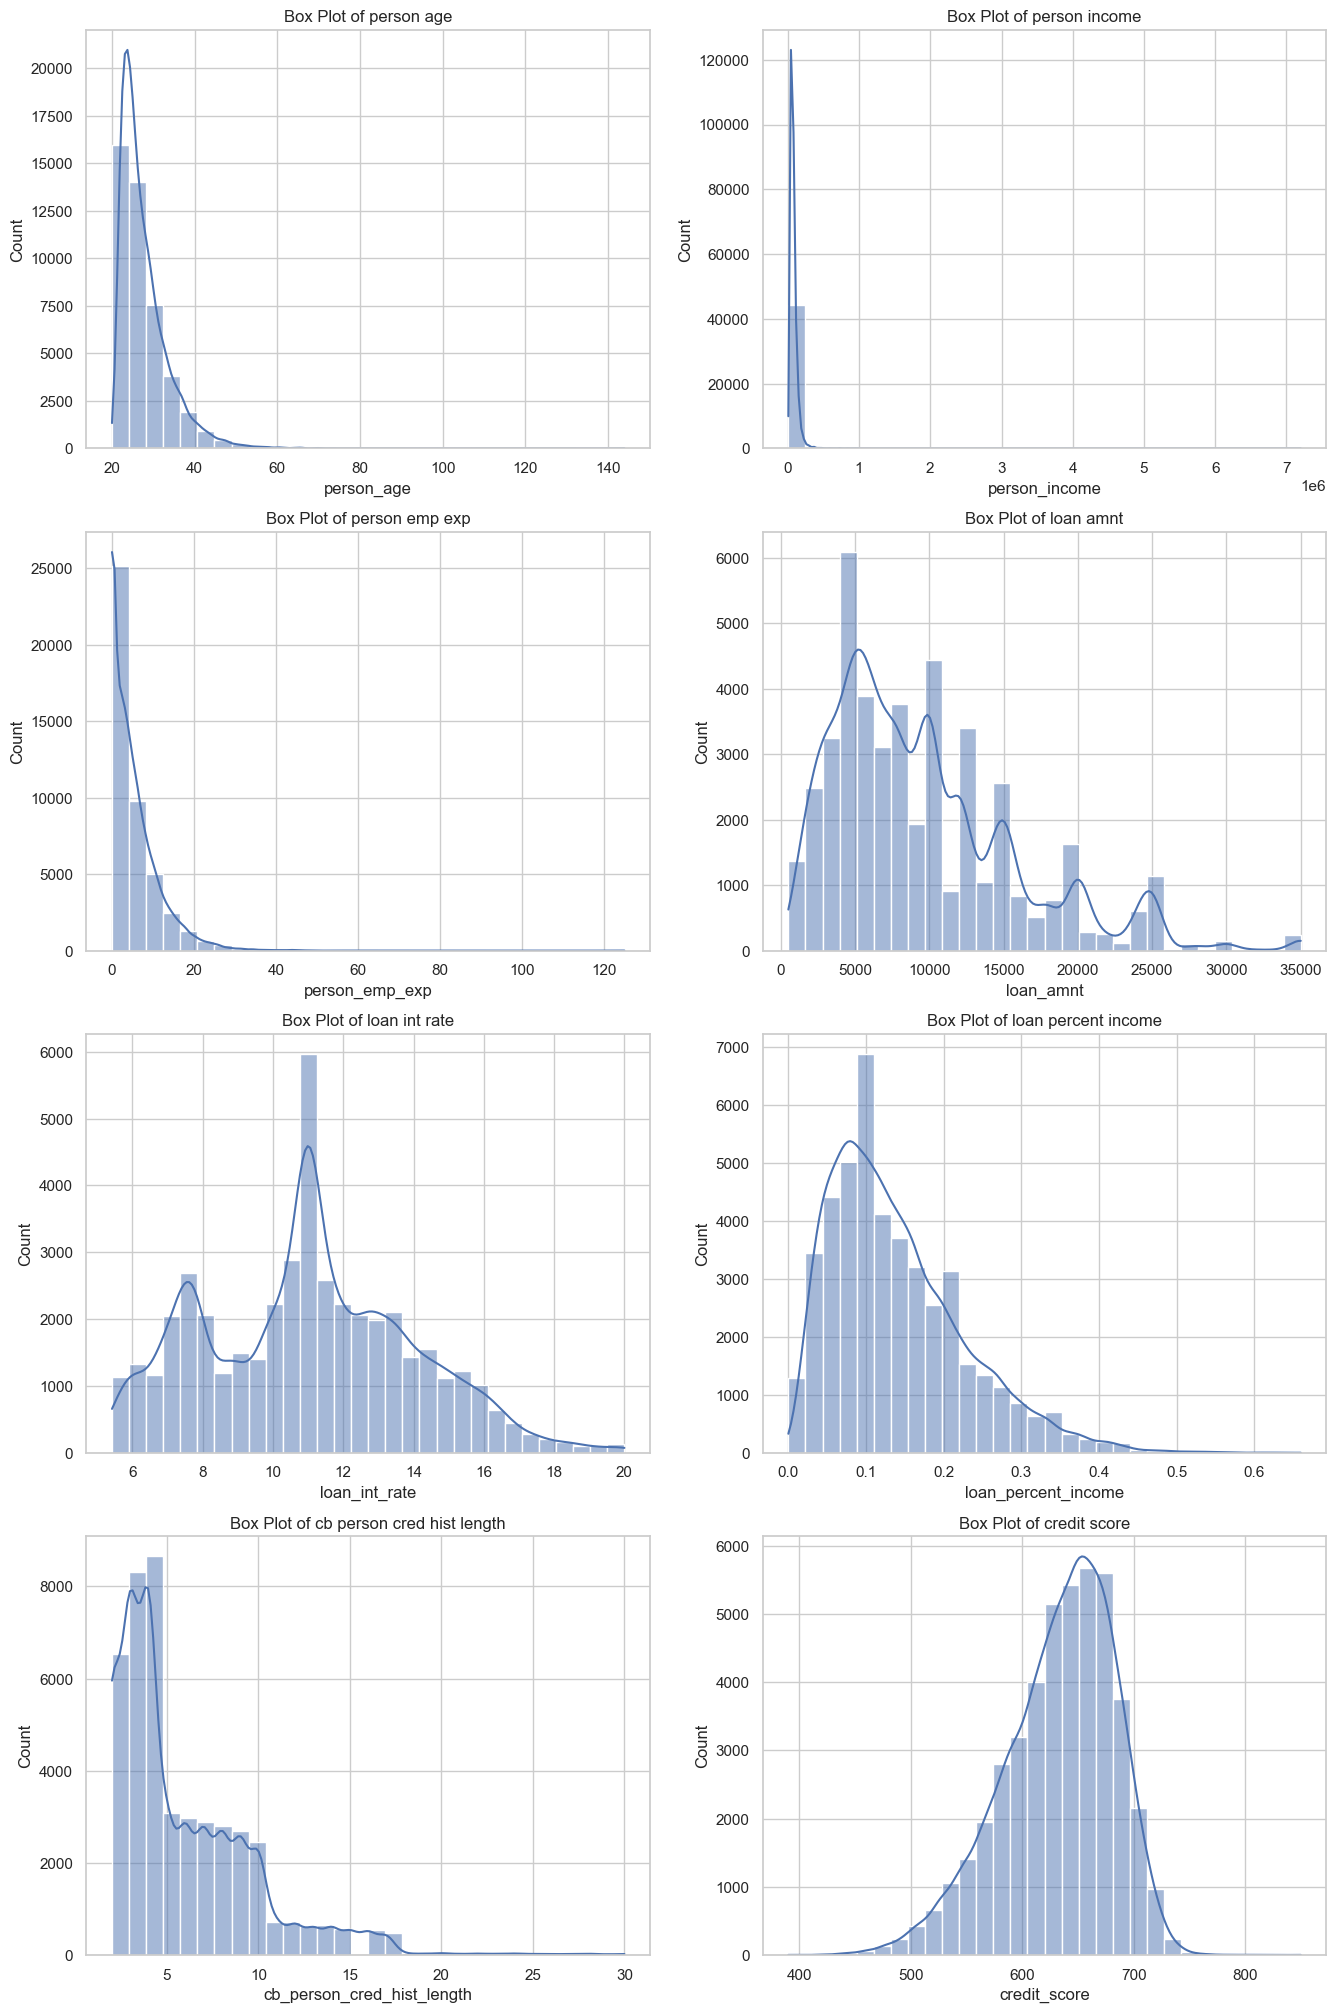

In [9]:
sns.set(style="whitegrid", font_scale=1)
fig, axes = plt.subplots(4, 2, figsize=(16,25))
img = 0
for row in range(4):
    for column in range(0, 2):
        axes[row, column].title.set_text("Box Plot of " + numrical_columns[img].replace("_", " "))
        sns.histplot(loan[numrical_columns[img]], ax=axes[row, column], kde=True, bins=30)
        img += 1

<h2>Data Preprocessing</h2>

In [10]:
category_columns = loan.drop(numrical_columns, axis=1)
category_columns

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file,loan_status
0,female,Master,RENT,PERSONAL,No,1
1,female,High School,OWN,EDUCATION,Yes,0
2,female,High School,MORTGAGE,MEDICAL,No,1
3,female,Bachelor,RENT,MEDICAL,No,1
4,male,Master,RENT,MEDICAL,No,1
...,...,...,...,...,...,...
44995,male,Associate,RENT,MEDICAL,No,1
44996,female,Associate,RENT,HOMEIMPROVEMENT,No,1
44997,male,Associate,RENT,DEBTCONSOLIDATION,No,1
44998,male,Bachelor,RENT,EDUCATION,No,1


In [11]:
# Binary encoding
loan["person_gender"] = loan["person_gender"].map({'female': 0, 'male': 1})
loan["previous_loan_defaults_on_file"] = loan["previous_loan_defaults_on_file"].map({'No': 0, 'Yes': 1})

# Ordinal encoding
education_order = {'High School': 1, 'Associate': 2, 'Bachelor': 3, 'Master': 4, 'Doctorate': 5}
loan['person_education'] = loan['person_education'].map(education_order)

# One-Hot encoding
loan = pd.get_dummies(loan, columns=['loan_intent', 'person_home_ownership'], drop_first=True)

median_age = loan["person_age"].median()
loan["person_age"] = loan["person_age"].apply(lambda x: median_age if x > 100 else x)
loan

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
0,22.0,0,4,71948.0,0,35000.0,16.02,0.49,3.0,561,0,1,False,False,False,True,False,False,False,True
1,21.0,0,1,12282.0,0,1000.0,11.14,0.08,2.0,504,1,0,True,False,False,False,False,False,True,False
2,25.0,0,1,12438.0,3,5500.0,12.87,0.44,3.0,635,0,1,False,False,True,False,False,False,False,False
3,23.0,0,3,79753.0,0,35000.0,15.23,0.44,2.0,675,0,1,False,False,True,False,False,False,False,True
4,24.0,1,4,66135.0,1,35000.0,14.27,0.53,4.0,586,0,1,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,2,47971.0,6,15000.0,15.66,0.31,3.0,645,0,1,False,False,True,False,False,False,False,True
44996,37.0,0,2,65800.0,17,9000.0,14.07,0.14,11.0,621,0,1,False,True,False,False,False,False,False,True
44997,33.0,1,2,56942.0,7,2771.0,10.02,0.05,10.0,668,0,1,False,False,False,False,False,False,False,True
44998,29.0,1,3,33164.0,4,12000.0,13.23,0.36,6.0,604,0,1,True,False,False,False,False,False,False,True


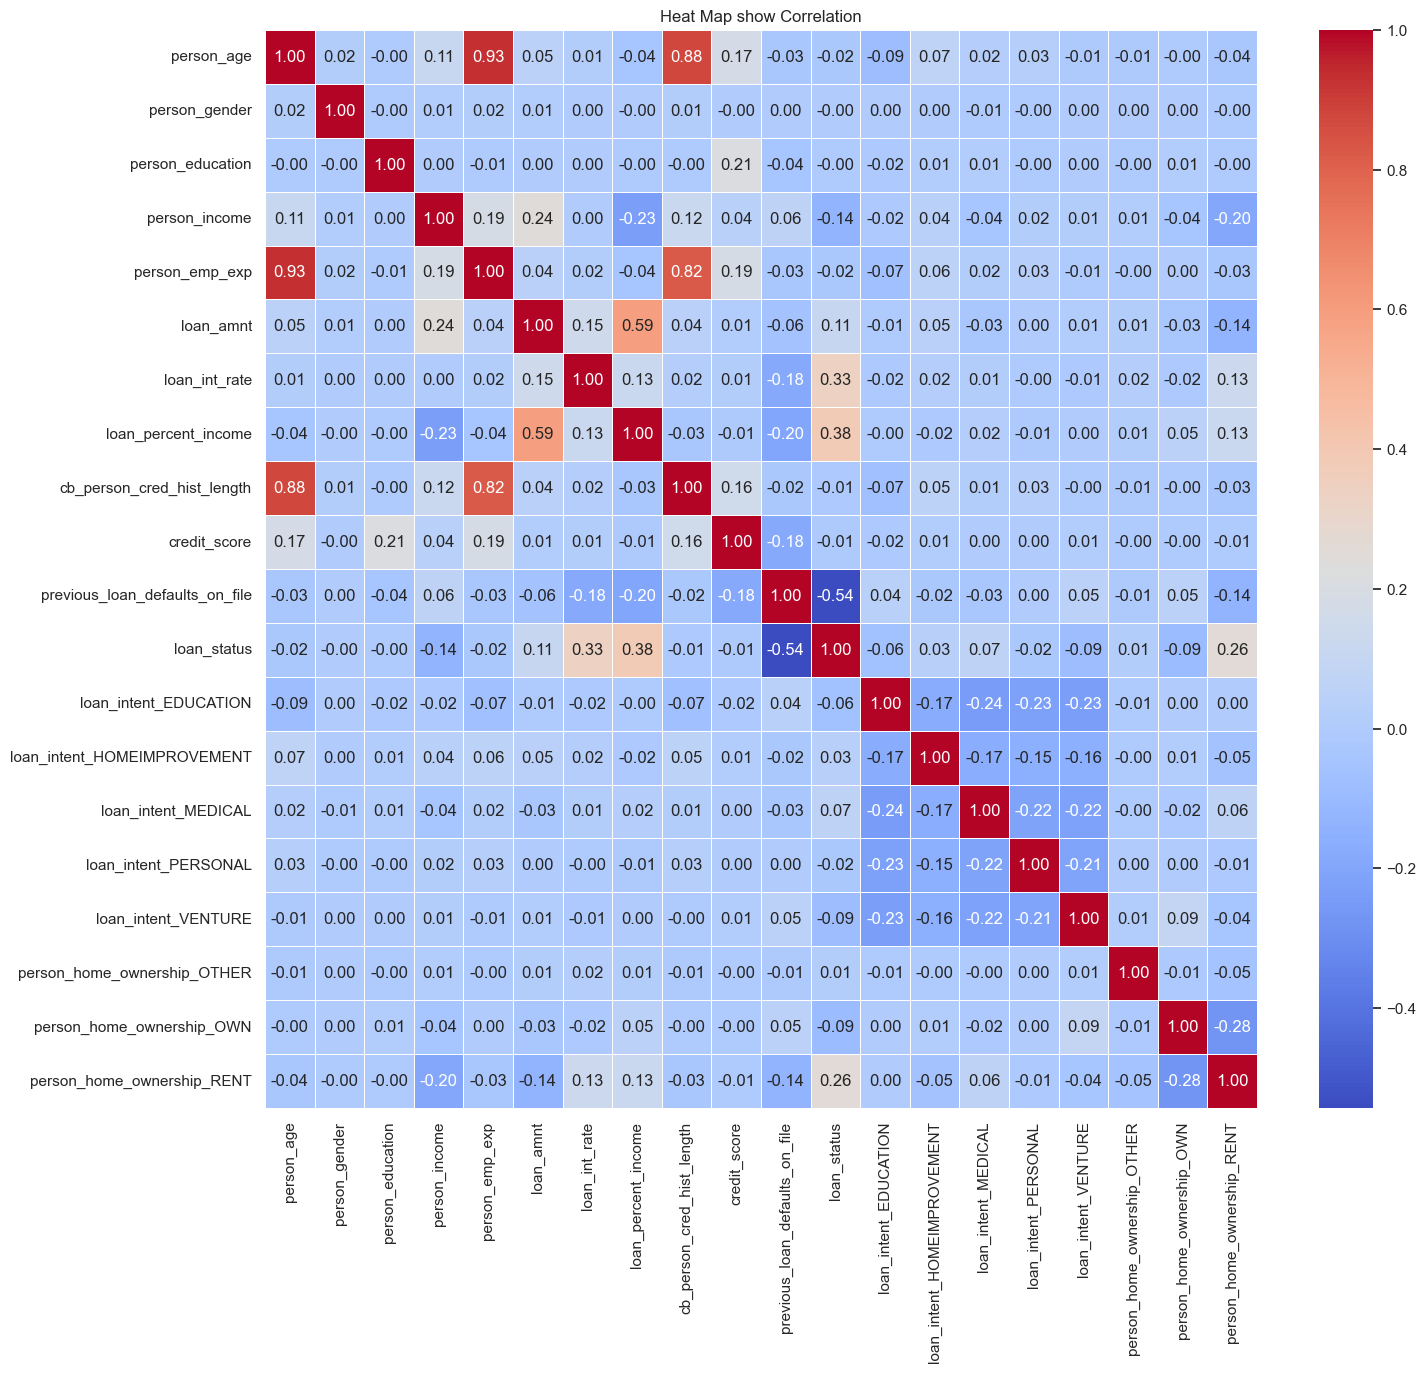

In [12]:
corr_matrix = loan.corr()

plt.figure(figsize=(16,14))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title("Heat Map show Correlation")
plt.show()

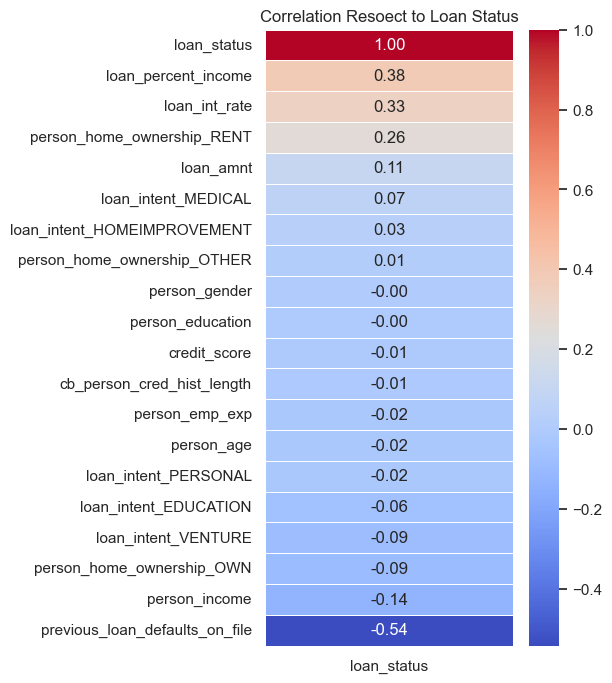

In [13]:
loan_status_corr = corr_matrix[['loan_status']].sort_values(ascending=False, by="loan_status")

plt.figure(figsize=(4,8))
sns.heatmap(loan_status_corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Resoect to Loan Status")
plt.show()

<h2>Building Models</h2>

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [15]:
X = loan.drop("loan_status", axis=1)
y = loan["loan_status"]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.3)

In [24]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "NaiveBayes": GaussianNB()
}

performance_reccord = []

for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    accuracy = accuracy_score(y_test, y_pred)

    performance_reccord.append({
        'model': name,
        'train_score': train_score,
        'test_score': test_score,
        'accuracy': accuracy,
        'evaluation': 'Before'
    })

    print(f'Classification Report for {name} Model')
    print(classification_report(y_test, y_pred))
    print("\n"+"="*60+"\n")


Classification Report for LogisticRegression Model
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     10493
           1       0.77      0.75      0.76      3007

    accuracy                           0.89     13500
   macro avg       0.85      0.84      0.85     13500
weighted avg       0.89      0.89      0.89     13500



Classification Report for RandomForest Model
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10493
           1       0.89      0.77      0.83      3007

    accuracy                           0.93     13500
   macro avg       0.91      0.87      0.89     13500
weighted avg       0.93      0.93      0.93     13500



Classification Report for NaiveBayes Model
              precision    recall  f1-score   support

           0       0.99      0.68      0.81     10493
           1       0.47      0.97      0.63      3007

    accuracy                           

<h2>Evaluation models</h2>

In [25]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    accuracy = accuracy_score(y_test, y_pred)

    performance_reccord.append({
        'model': name,
        'train_score': train_score,
        'test_score': test_score,
        'accuracy': accuracy,
        'evaluation': 'After'
    })

    print(f'Classification Report for {name} Model')
    print(classification_report(y_test, y_pred))
    print("\n"+"="*60+"\n")

Classification Report for LogisticRegression Model
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     10493
           1       0.77      0.75      0.76      3007

    accuracy                           0.89     13500
   macro avg       0.85      0.84      0.85     13500
weighted avg       0.89      0.89      0.89     13500



Classification Report for RandomForest Model
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10493
           1       0.89      0.77      0.83      3007

    accuracy                           0.93     13500
   macro avg       0.91      0.87      0.89     13500
weighted avg       0.93      0.93      0.93     13500



Classification Report for NaiveBayes Model
              precision    recall  f1-score   support

           0       0.99      0.68      0.81     10493
           1       0.47      0.97      0.63      3007

    accuracy                           

In [27]:
performance_df = pd.DataFrame(performance_reccord)
performance_df

,model,train_score,test_score,accuracy,evaluation
0,LogisticRegression,0.897841,0.894519,0.894519,Before
1,RandomForest,1.000000,0.928370,0.928370,Before
2,NaiveBayes,0.749556,0.748741,0.748741,Before
3,LogisticRegression,0.897841,0.894519,0.894519,After
4,RandomForest,1.000000,0.928370,0.928370,After
5,NaiveBayes,0.749556,0.748741,0.748741,After


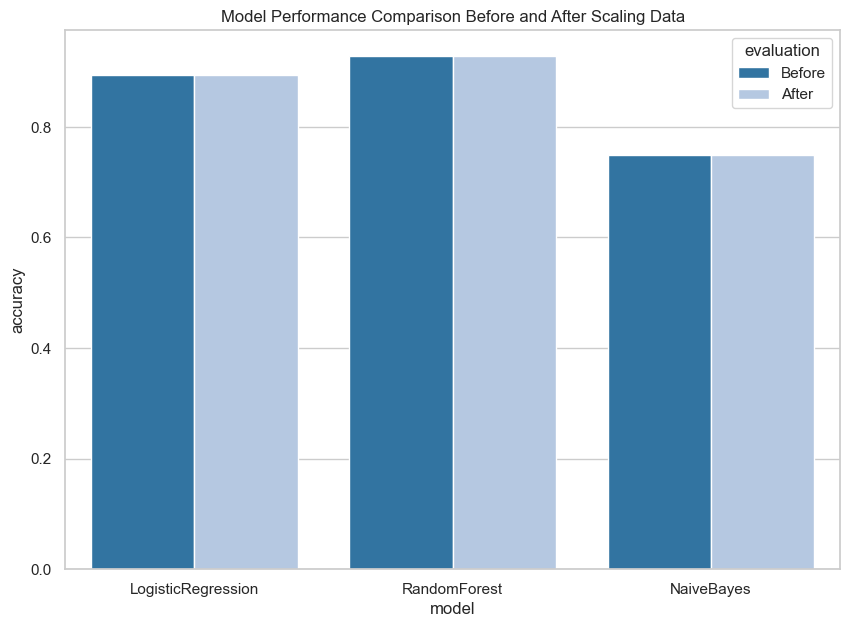

In [28]:
sns.set(style="whitegrid", font_scale=1)
plt.figure(figsize=(10, 7))
sns.barplot(data=performance_df,x="model", y="accuracy", hue="evaluation", palette="tab20")
plt.title("Model Performance Comparison Before and After Scaling Data")
plt.show()